In [1]:
import flair

In [2]:
import pandas as pd
data = pd.read_csv("flair_train_new.csv")#.sample(frac=1).drop_duplicates()
data = data[['label', 'text']] #.rename(columns={"v1":"label", "v2":"text"})

data['label'] = '__label__' + data['label'].astype(str)
data['text'] = data['text'].astype(str)
data.head()

,label,text
0,__label__smarthands,modify order request for no modify order detai...
1,__label__others,【監視停止依頼】東京ガス equinix cloud exchange（ ～ ） エクイニク...
2,__label__smarthands,modify order request for no modify order detai...
3,__label__others,ticketid 【跟进故���原因】腾讯建设专线 在 分左右中断 div div 专线 s...
4,__label__trouble,答复 em 咨询 根据你们提供的ip地址，该客户使用的地址段为 ，客户可用地址为 ，所以你们...


In [18]:
import pandas as pd
data = pd.read_csv("flair_train.csv") #.sample(frac=1).drop_duplicates()
data = data[['label', 'text']] #.rename(columns={"v1":"label", "v2":"text"})
 
data['label'] = '__label__' + data['label'].astype(str)
data.iloc[0:int(len(data)*0.3)].to_csv('train.csv', sep='\t', index = False, header = False)
data.iloc[int(len(data)*0.3):int(len(data)*0.4)].to_csv('test.csv', sep='\t', index = False, header = False)
data.iloc[int(len(data)*0.4):int(len(data)*0.5)].to_csv('dev.csv', sep='\t', index = False, header = False);
data.head()

,label,text
0,__label__smarthands,der zutritt würde verweigert herr wälchli sand...
1,__label__zinstall_crossconnect,modify order request for no modify order detai...
2,__label__work_visit,modify order request for no modify order detai...
3,__label__others,re re urgente de revision de parcheos dos line...
4,__label__trouble,关于trouble ticket 烦请向客户sip申请以下内容： 我们收到nova的trou...


In [8]:
data_train = pd.read_csv('train.csv',sep='\t',header=None)

In [9]:
data_train.isnull().sum()

0    0
1    0
dtype: int64

In [3]:
label_dictionary = []
len_label_dict = []
text_dictionary = []
len_text_dict = []
for i in range(len(data)):
    #if label=="" :
    #    print('null')
    label_dictionary.append(data.loc[i,'label'])
    text_dictionary.append(data.loc[i,'text'])
    len_label_dict.append(len(data.loc[i,'label']))
    len_text_dict.append(len(data.loc[i,'text']))
    if(len(data.loc[i,'text']) == 1):
        print(i)
len(label_dictionary)

9153


50064

In [4]:
data = data.drop([data.index[9153]])

In [5]:
data.iloc[0:int(len(data)*0.8)].to_csv('train.csv', sep='\t', index = False, header = False)
data.iloc[int(len(data)*0.8):int(len(data)*0.9)].to_csv('test.csv', sep='\t', index = False, header = False)
data.iloc[int(len(data)*0.9):].to_csv('dev.csv', sep='\t', index = False, header = False);

In [42]:
#pd.DataFrame({'labels':label_dictionary,'length':len_label_dict,'text':text_dictionary,'length_text':len_text_dict}).to_csv('lengths.csv')

In [6]:
from flair.data_fetcher import NLPTaskDataFetcher
from flair.embeddings import WordEmbeddings, FlairEmbeddings, DocumentLSTMEmbeddings, DocumentRNNEmbeddings
from flair.models import TextClassifier
from flair.trainers import ModelTrainer
from pathlib import Path
from flair.datasets import ClassificationCorpus
from flair.data import Corpus

In [7]:
corpus: Corpus = ClassificationCorpus(Path('./'), test_file='test.csv', dev_file='dev.csv', train_file='train.csv')

2019-11-05 08:11:07,896 Reading data from .
2019-11-05 08:11:07,898 Train: train.csv
2019-11-05 08:11:07,898 Dev: dev.csv
2019-11-05 08:11:07,899 Test: test.csv


In [8]:
label_dict = corpus.make_label_dictionary()

2019-11-05 08:11:19,187 Computing label dictionary. Progress:


100%|██████████| 40050/40050 [02:12<00:00, 302.25it/s]

2019-11-05 08:13:32,111 [b'smarthands', b'others', b'trouble', b'zinstall_crossconnect', b'zinbound_shipment', b'work_visit']


In [14]:
word_embeddings = [WordEmbeddings('glove')] #,
                   #FlairEmbeddings('news-forward-fast')
                   #FlairEmbeddings('news-backward-fast'),
                   #FlairEmbeddings('multi-forward')
                   #FlairEmbeddings('multi-backward')]

In [15]:
document_embeddings = DocumentRNNEmbeddings(word_embeddings, hidden_size=512, reproject_words=True, reproject_words_dimension=256)

In [16]:
classifier = TextClassifier(document_embeddings, label_dictionary=label_dict, multi_label=False)

In [ ]:
#document_embeddings = document_embeddings.to(flair.device)

In [17]:
trainer = ModelTrainer(classifier, corpus)

In [49]:
# 7. find learning rate
learning_rate_tsv = trainer.find_learning_rate('./', 'learning_rate.tsv')

2019-11-01 10:17:41,893 ----------------------------------------------------------------------------------------------------
2019-11-01 10:17:41,895 learning rate finder finished - plot learning_rate.tsv
2019-11-01 10:17:41,896 ----------------------------------------------------------------------------------------------------


In [50]:
trainer

Learning_rate plots are saved in learning_rate.png


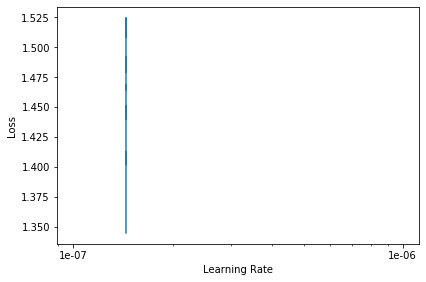

In [51]:
# 8. plot the learning rate finder curve
from flair.visual.training_curves import Plotter
plotter = Plotter()
plotter.plot_learning_rate(learning_rate_tsv)

In [18]:
trainer.train('./', max_epochs=5, mini_batch_size = 32)# , embeddings_storage_mode= "none")

2019-11-05 08:16:21,962 ----------------------------------------------------------------------------------------------------
2019-11-05 08:16:21,963 Model: "TextClassifier(
  (document_embeddings): DocumentRNNEmbeddings(
    (embeddings): StackedEmbeddings(
      (list_embedding_0): WordEmbeddings('glove')
    )
    (word_reprojection_map): Linear(in_features=100, out_features=256, bias=True)
    (rnn): GRU(256, 512)
    (dropout): Dropout(p=0.5, inplace=False)
  )
  (decoder): Linear(in_features=512, out_features=6, bias=True)
  (loss_function): CrossEntropyLoss()
)"
2019-11-05 08:16:21,965 ----------------------------------------------------------------------------------------------------
2019-11-05 08:16:21,966 Corpus: "Corpus: 40050 train + 5007 dev + 5006 test sentences"
2019-11-05 08:16:21,966 ----------------------------------------------------------------------------------------------------
2019-11-05 08:16:21,967 Parameters:
2019-11-05 08:16:21,967  - learning_rate: "0.1"
2019

/home/vjhunjhunwala/.conda/envs/flair/lib/python3.6/site-packages/torch/serialization.py:292: UserWarning: Couldn't retrieve source code for container of type DocumentRNNEmbeddings. It won't be checked for correctness upon loading.
  "type " + obj.__name__ + ". It won't be checked "
/home/vjhunjhunwala/.conda/envs/flair/lib/python3.6/site-packages/torch/serialization.py:292: UserWarning: Couldn't retrieve source code for container of type StackedEmbeddings. It won't be checked for correctness upon loading.
  "type " + obj.__name__ + ". It won't be checked "
/home/vjhunjhunwala/.conda/envs/flair/lib/python3.6/site-packages/torch/serialization.py:292: UserWarning: Couldn't retrieve source code for container of type WordEmbeddings. It won't be checked for correctness upon loading.
  "type " + obj.__name__ + ". It won't be checked "
/home/vjhunjhunwala/.conda/envs/flair/lib/python3.6/site-packages/torch/serialization.py:292: UserWarning: Couldn't retrieve source code for container of type 

2019-11-05 08:36:58,496 ----------------------------------------------------------------------------------------------------
2019-11-05 08:37:00,437 epoch 2 - iter 0/1252 - loss 1.39673710 - samples/sec: 4505.96
2019-11-05 08:38:43,060 epoch 2 - iter 125/1252 - loss 1.46641599 - samples/sec: 43.48
2019-11-05 08:42:14,041 epoch 2 - iter 375/1252 - loss 1.46966350 - samples/sec: 43.41
2019-11-05 08:43:54,590 epoch 2 - iter 500/1252 - loss 1.46669438 - samples/sec: 44.24
2019-11-05 08:45:32,439 epoch 2 - iter 625/1252 - loss 1.46025094 - samples/sec: 45.41
2019-11-05 08:47:05,939 epoch 2 - iter 750/1252 - loss 1.45736593 - samples/sec: 48.21
2019-11-05 08:48:57,359 epoch 2 - iter 875/1252 - loss 1.45606962 - samples/sec: 40.42
2019-11-05 08:50:38,681 epoch 2 - iter 1000/1252 - loss 1.45452316 - samples/sec: 44.20
2019-11-05 08:52:16,176 epoch 2 - iter 1125/1252 - loss 1.45158331 - samples/sec: 46.50
2019-11-05 08:53:56,513 epoch 2 - iter 1250/1252 - loss 1.45068653 - samples/sec: 45.47
20

Process Process-48:
Process Process-46:


2019-11-05 10:26:49,979 ----------------------------------------------------------------------------------------------------


Process Process-50:


2019-11-05 10:26:49,980 Exiting from training early.


Process Process-49:


2019-11-05 10:26:49,981 Saving model ...


Process Process-47:
Process Process-45:
  File "/home/vjhunjhunwala/.conda/envs/flair/lib/python3.6/multiprocessing/util.py", line 322, in _exit_function
    _run_finalizers()
  File "/home/vjhunjhunwala/.conda/envs/flair/lib/python3.6/multiprocessing/process.py", line 261, in _bootstrap
    util._exit_function()
  File "/home/vjhunjhunwala/.conda/envs/flair/lib/python3.6/multiprocessing/process.py", line 261, in _bootstrap
    util._exit_function()
  File "/home/vjhunjhunwala/.conda/envs/flair/lib/python3.6/multiprocessing/util.py", line 322, in _exit_function
    _run_finalizers()
  File "/home/vjhunjhunwala/.conda/envs/flair/lib/python3.6/multiprocessing/util.py", line 322, in _exit_function
    _run_finalizers()
  File "/home/vjhunjhunwala/.conda/envs/flair/lib/python3.6/multiprocessing/util.py", line 322, in _exit_function
    _run_finalizers()
Traceback (most recent call last):
Traceback (most recent call last):
Traceback (most recent call last):
Traceback (most recent call last)

2019-11-05 10:26:53,617 Done.
2019-11-05 10:26:53,618 ----------------------------------------------------------------------------------------------------
2019-11-05 10:26:53,619 Testing using best model ...
2019-11-05 10:26:53,620 loading file best-model.pt
2019-11-05 10:28:35,313 0.4277	0.4277	0.4277
2019-11-05 10:28:35,315 
MICRO_AVG: acc 0.272 - f1-score 0.4277
MACRO_AVG: acc 0.1815 - f1-score 0.28404999999999997
others     tp: 1142 - fp: 1398 - fn: 721 - tn: 1745 - precision: 0.4496 - recall: 0.6130 - accuracy: 0.3502 - f1-score: 0.5187
smarthands tp: 494 - fp: 727 - fn: 776 - tn: 3009 - precision: 0.4046 - recall: 0.3890 - accuracy: 0.2474 - f1-score: 0.3966
trouble    tp: 349 - fp: 659 - fn: 447 - tn: 3551 - precision: 0.3462 - recall: 0.4384 - accuracy: 0.2399 - f1-score: 0.3869
work_visit tp: 156 - fp: 79 - fn: 385 - tn: 4386 - precision: 0.6638 - recall: 0.2884 - accuracy: 0.2516 - f1-score: 0.4021
zinbound_shipment tp: 0 - fp: 1 - fn: 155 - tn: 4850 - precision: 0.0000 - rec

{'test_score': 0.4277,
 'dev_score_history': [0.4032, 0.4242, 0.4314],
 'train_loss_history': [1.5073360807408158,
  1.4506072847607037,
  1.4274235529640613],
 'dev_loss_history': [tensor(1.4572, device='cuda:0'),
  tensor(1.4118, device='cuda:0'),
  tensor(1.4016, device='cuda:0')]}

In [52]:
import flair
from flair.data import Sentence, Token

classifier = TextClassifier.load('./best-model.pt')
sentence = Sentence('This is a smart hand request')
classifier.predict(sentence)
print(sentence.labels)

2019-11-01 10:34:43,352 loading file ./best-model.pt
[trouble (0.4692027270793915)]


In [10]:
import torch
print(torch.cuda.is_available())

True


Weights plots are saved in weights.png


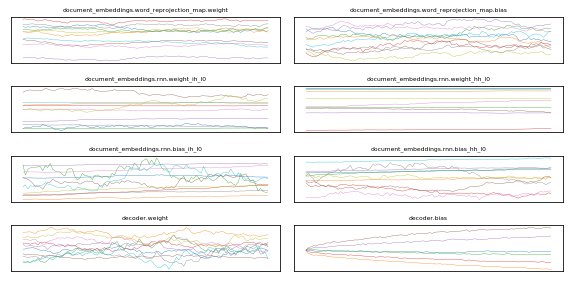

In [27]:
from flair.visual.training_curves import Plotter
plotter = Plotter()
plotter.plot_weights('weights.txt')